In [1]:
#from Mis_funciones_graficas import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import operator
import pylab as pl
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns


################33----------------GRAFICAN  ALOS 32 ESTADOS---------------------------------------#################################################################

##########################################################################
# Esta funcion es para....
##########################################################################

def Columna_pais_ORIGEN_NACIONALIDAD(df,COL):
    
    ct_pais=pd.crosstab(index=df_pais['UCI'], columns=df_pais[COL]).apply(lambda r: r/r.sum() *100,axis=1)    
    porcentajes=list(ct_pais.values[0])
    nombres_paises=list(ct_pais.columns)
    explode=list(np.zeros(len(porcentajes)))
    plt.pie(porcentajes[1:], labels=nombres_paises[1:], explode=explode[1:],autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('PAISES')
    plt.show()
##########################################################################
# Esta funcion es para....
##########################################################################    
    
def Columna_sector(df_cdmx_SIN_99_97):
    
    TC_SECTOR=pd.crosstab(index=df_cdmx_SIN_99_97['UCI'], columns=df_cdmx_SIN_99_97['SECTOR']
               ).apply(lambda r: r/r.sum() *100,
                                    axis=0)
 
    TC_SECTOR=np.array(TC_SECTOR)
    dicc_setor=dict(zip(np.array([1,3,4,5,6,8,9,10,11,12]),TC_SECTOR[0]))
    dicc_setor_ordenado=sorted(dicc_setor.items(), key=operator.itemgetter(1), reverse=True)
    dicc_setor_ordenado_D=dict(dicc_setor_ordenado)
    X = np.arange(len(dicc_setor_ordenado_D))
    pl.bar(X, dicc_setor_ordenado_D.values(), align='center', width=0.5)
    pl.xticks(X, dicc_setor_ordenado_D.keys())
    ymax = max(dicc_setor_ordenado_D.values()) + 1
    pl.ylim(0, ymax)
    pl.show() 
##########################################################################
# Esta funcion es para....
##########################################################################    
    
def graficar_si_no(si,no,columna,color1,color2,indice_estado,etiqueta_y):
    
    plt.bar(np.arange(0.25,32,1), no, label = 'No', width = 0.5, color = color1)
    plt.bar(np.arange(0.75,32,1), si, label = 'Si', width = 0.5, color = color2 )
    plt.title(columna)
    plt.ylabel(etiqueta_y)
    plt.xlabel('Estados')
    plt.xticks(indice_estado+0.38, [
            "1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24",
            "25","26","27","28","29","30","31","32"])
    plt.legend()
    plt.show()  
##########################################################################
# Esta funcion es para....
##########################################################################    
    
def Columnas_SI_NO(df_covid,columna,color1,color2,color3,color4):  
        
    df_enf=df_covid[(df_covid[columna]<3)] #Para solo tomar en cuenta valores 1 y 2 de enferemedad 
    si_renglon=[]
    no_renglon=[]
    
    si_columna=[]
    no_columna=[]
    
    indice_estado=np.arange(1,33)   
    
    for i in range (32):   
        
        df_estado=df_enf.drop(df_enf[df_enf['ENTIDAD_RES']!= indice_estado[i] ].index)   
        ####################################          
        tabla_contingencia_renglon=pd.crosstab(index=df_estado['UCI'], columns=df_estado[columna]).apply(lambda r: r/r.sum() *100,axis=1)
        tabla_contingencia_array_renglon=np.array(tabla_contingencia_renglon)        
        no_renglon.append(round(tabla_contingencia_array_renglon[0][1],6))
        si_renglon.append(round(tabla_contingencia_array_renglon[0][0],6))
        
        tabla_contingencia_columna=pd.crosstab(index=df_estado['UCI'], columns=df_estado[columna]).apply(lambda r: r/r.sum() *100,axis=0)
        tabla_contingencia_array_columna=np.array(tabla_contingencia_columna)
        
        no_columna.append(round(tabla_contingencia_array_columna[0][1],6))
        si_columna.append(round(tabla_contingencia_array_columna[0][0],6))
        
    graficar_si_no(si_renglon,no_renglon,columna,color1,color2,indice_estado,"etiqueta_y_renglon")
    graficar_si_no(si_columna,no_columna,columna,color3,color4,indice_estado,"etiqueta_y_columna")
        
##########################################################################
# Esta funcion es para....
##########################################################################       
    
def Columna_tipo_paciente(df):     
    ambulatorio=[]
    hospitalizado=[]
    
    ind=np.arange(1,33)  
    for i in range (32): 
        
        df_cdmx=df.drop(df[df['ENTIDAD_RES']!= ind[i] ].index) 
        ct_sexo=pd.crosstab(index=df_cdmx['UCI'], columns=df_cdmx['TIPO_PACIENTE']).apply(lambda r: r/r.sum() *100,axis=1)        
        ct_sexo_array=np.array(ct_sexo)        
        hospitalizado.append(round(ct_sexo_array[0][1],6))
        ambulatorio.append(round(ct_sexo_array[0][0],6))
    x1=np.arange(0.25,32,1)
    y1=hospitalizado    
    x2=np.arange(0.75,32,1)    
    y2=ambulatorio    
  #  #Configurar las características del gráfico
    plt.bar(x1, y1, label = 'Hospitalizado', width = 0.5, color = 'red')
    plt.bar(x2, y2, label = 'ambulatorio', width = 0.5, color = 'black')
    plt.title('TIPO_PACIENTE DE CADA ESTADO')
    plt.ylabel('% TIPO_PACIENTE en UCI ')
    plt.xlabel('estados')
    #plt.xticks(X+0.38, [
    #    "1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24",
    #    "25","26","27","28","29","30","31","32"])
    plt.legend()
    plt.show()
##########################################################################
# Esta funcion es para....
##########################################################################    
    
def Columna_entidad_UM(df_cdmx_SIN_99_97):
    print(pd.value_counts(df_cdmx_SIN_99_97['ENTIDAD_UM'])) 
##########################################################################
# Esta funcion es para....
##########################################################################   
    
def parte_tabla(df,band):
   #band=0 2x2
   #band=1 2x6
    t=np.array(df)
    if(band==0):
        nueva=np.array([[t[0][0],t[0][1]],
                        [t[1][0],t[1][1]]])
    if(band==1):
       
         nueva=np.array([[t[0][0],t[0][1],t[0][2],t[0][3],t[0][4],t[0][5]],
                        [t[1][0],t[1][1],t[0][2],t[0][3],t[0][4],t[0][5]]])
        
    return nueva
##########################################################################
# Esta funcion es para....
##########################################################################
def Columna_edad(df_cdmx_SIN_99_97):  
    mat=[]    
    ind=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
    
    for i in range (32):              
        df_cdmx=df.drop(df[df['ENTIDAD_RES']!= ind[i] ].index) 
        ct_edad=pd.crosstab(index=df_cdmx['UCI'], columns=df_cdmx['EDAD']).apply(lambda r: r/r.sum() *100,axis=1)        
        ct_edad_array=np.array(ct_edad)
        mat.append(ct_edad_array[0])
        
    X = np.arange(6)
    plt.bar(X + 0.00, mat[0], color = "b", width = 0.25)
    plt.bar(X + 0.25,  mat[1], color = "g", width = 0.25)
    plt.bar(X + 0.50,  mat[2], color = "r", width = 0.25)
    plt.bar(X + 0.75,  mat[3], color = "y", width = 0.25)
    plt.bar(X + 1.00,  mat[4], color = "b", width = 0.25)
    plt.bar(X + 1.25,  mat[5] , color = "g", width = 0.25)
    plt.bar(X + 1.50,  mat[6], color = "r", width = 0.25)
    plt.bar(X + 1.75,  mat[7], color = "y", width = 0.25)
    plt.bar(X + 2.0,  mat[8], color = "b", width = 0.25)
    plt.bar(X + 2.25,  mat[9], color = "g", width = 0.25)
    plt.bar(X + 2.50,  mat[10], color = "r", width = 0.25)
    plt.bar(X + 2.75,  mat[11], color = "y", width = 0.25)    
    
    plt.bar(X + 3.00, mat[12], color = "b", width = 0.25)
    plt.bar(X + 3.25,  mat[13], color = "g", width = 0.25)
    plt.bar(X + 3.50,  mat[14], color = "r", width = 0.25)
    plt.bar(X + 3.75,  mat[15], color = "y", width = 0.25)
    plt.bar(X + 4.00,  mat[16], color = "b", width = 0.25)
    plt.bar(X + 4.25,  mat[17] , color = "g", width = 0.25)
    plt.bar(X + 4.50,  mat[18], color = "r", width = 0.25)
    plt.bar(X + 4.75,  mat[19], color = "y", width = 0.25)
    plt.bar(X + 5.0,  mat[20], color = "b", width = 0.25)
    plt.bar(X + 5.25,  mat[21], color = "g", width = 0.25)
    plt.bar(X + 5.50,  mat[22], color = "r", width = 0.25)
    plt.bar(X + 5.75,  mat[23], color = "y", width = 0.25)
    
    
    plt.bar(X + 6.00, mat[24], color = "b", width = 0.25)
    plt.bar(X + 6.25,  mat[25], color = "g", width = 0.25)
    plt.bar(X + 6.50,  mat[26], color = "r", width = 0.25)
    plt.bar(X + 6.75,  mat[27], color = "y", width = 0.25)
    plt.bar(X + 7.00,  mat[28], color = "b", width = 0.25)
    plt.bar(X + 7.25,  mat[29] , color = "g", width = 0.25)
    plt.bar(X + 7.50,  mat[30], color = "r", width = 0.25)
    plt.bar(X + 7.75,  mat[31], color = "y", width = 0.25)

   # plt.xticks(X+0.38, ["A","B","C","D"])
##########################################################################
# Esta funcion es para....
##########################################################################
def riesgo_relativo(mat):
    
    num=mat[0][0]/(mat[0][0]+mat[0][1])
    den=mat[1][0]/(mat[1][0]+mat[1][1])    
  
    return num/den

def tabla_de_contingencia(df_cont,col1,col2):
    return pd.crosstab(index=df_cont[col1],columns=df_cont[col2],margins=True)
##########################################################################
# Esta funcion es para....
##########################################################################

def porcentaje_de_UCI(mat):
    
    cien=100
    total_variable=mat[0][0]+mat[0][1]
    si_si=mat[0][0]
    ope=(si_si*cien)/total_variable
    
    return ope 
##########################################################################
# Esta funcion es para....
##########################################################################

def Columna_pais_nacionalidad(df_cdmx_SIN_99_97):
    paises=pd.value_counts(df_cdmx_SIN_99_97['PAIS_NACIONALIDAD'])
    print(paises[:10])
##########################################################################
# Esta funcion es para....
##########################################################################    
    
def Columna_entidad_nac(df_cdmx_SIN_99_97):
    print(pd.value_counts(df_cdmx_SIN_99_97['ENTIDAD_NAC']))  
    plot = df_cdmx['ENTIDAD_NAC'].value_counts().plot(kind='bar',
                                            title='ENTIDAD_NAC')
    
##########################################################################
# Esta funcion es para....
##########################################################################
def leer_archivo(nombre_archivo):
    return pd.read_csv(nombre_archivo, sep=',', engine='python') 

##########################################################################
# Esta funcion es para....
##########################################################################

def riesgo_relativo(mat):
    
    num=mat[0][0]/(mat[0][0]+mat[0][1])
    den=mat[1][0]/(mat[1][0]+mat[1][1])    
  
    return num/den


def Odds_ratio(mat):      
    num=mat[0][0]*mat[1][1]
    den=mat[1][0]*mat[0][1]
   
    return num/den

##########################################################################
# Esta funcion es para....
##########################################################################

def FAe(mat):
    
    Ie = mat[0][0]/(mat[0][0]+mat[0][1])
    Io = mat[1][0]/(mat[1][0]+mat[1][1])
    num=Ie-Io
    
    return num/Ie  
##########################################################################
# Esta funcion es para....
##########################################################################

def RAe(mat):
    
    Ie = mat[0][0]/(mat[0][0]+mat[0][1])
    Io = mat[1][0]/(mat[1][0]+mat[1][1])
     
    return Ie-Io 
##########################################################################
# Esta funcion es para....
##########################################################################

def FAp(mat):    
    It = (mat[0][0]+mat[1][0])/(mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
    Io = mat[1][0]/(mat[1][0]+mat[1][1])    
    num=It-Io     
    return num/It 
##########################################################################
# Esta funcion es para....
##########################################################################

def mi_tabla_de_contingencia_2por2(df,col1,col2):
    
    UCI_otra = df[[col1,col2]]
  
    tabla_contingencia=np.array([ [len(UCI_otra[(UCI_otra[col1]==1) & (UCI_otra[col2]==1)]),  len(UCI_otra[(UCI_otra[col1]==1) &   (UCI_otra[col2]==2)])],
                                 [  len(UCI_otra[(UCI_otra[col1]==2) & (UCI_otra[col2]==1)]),  len(UCI_otra[(UCI_otra[col1]==2) & (UCI_otra[col2]==2)])]])
        
    return tabla_contingencia

##########################################################################
# Esta funcion es para....
##########################################################################
def mi_tabla_de_contingenciaEDAD(df,col1,col2):
    
    UCI_otra = df[[col1,col2]]  
    tabla_contingencia=np.array([ [len(UCI_otra[(UCI_otra[col1]==1) & (UCI_otra[col2]=='1')]),  len(UCI_otra[(UCI_otra[col1]==1) & (UCI_otra[col2]=='2')]),
                                  len(UCI_otra[(UCI_otra[col1]==1) & (UCI_otra[col2]=='3')]),len(UCI_otra[(UCI_otra[col1]==1) & (UCI_otra[col2]=='4')]),
                                   len(UCI_otra[(UCI_otra[col1]==1) & (UCI_otra[col2]=='5')]),len(UCI_otra[(UCI_otra[col1]==1) & (UCI_otra[col2]=='6')])
                                  
                                  ],                                 
                                 
                                 [len(UCI_otra[(UCI_otra[col1]==2) & (UCI_otra[col2]=='1')]),  len(UCI_otra[(UCI_otra[col1]==2) & (UCI_otra[col2]=='2')]),
                                   len(UCI_otra[(UCI_otra[col1]==2) & (UCI_otra[col2]=='3')]),  len(UCI_otra[(UCI_otra[col1]==2) & (UCI_otra[col2]=='4')]),
                                   len(UCI_otra[(UCI_otra[col1]==2) & (UCI_otra[col2]=='5')]),  len(UCI_otra[(UCI_otra[col1]==2) & (UCI_otra[col2]=='6')])
                                                            
                                 
                                 ]])
        
    return tabla_contingencia



##########################################################################
# Esta funcion es para....
##########################################################################
def chi_cuadrada(obs):  

    prob=0.95
    stat,p_val,dof,exp_val=chi2_contingency(obs) 
    alpha = 1.0 - prob
    
    if p_val <= alpha:
        return 'Dependiente'
    else:
        return 'Independiente'
##########################################################################
# Esta funcion es para....
##########################################################################    
def fisher(obs):
   
    prob=0.95
    alpha = 1.0 - prob
    oddsratio, pvalue = stats.fisher_exact(obs)   
  
    if pvalue <= alpha:
        return 'Dependiente'
    else:
        return 'Independiente'   
##########################################################################
# Esta funcion es para....
##########################################################################    
def info_dataFrame(df):     
    print("tamaño ",len(df))
    print("total columnas",len(df.dtypes))
    print("Tipos de columnas")
    print(df.dtypes)
    print(df.head())   
##########################################################################
# Esta funcion es para....
##########################################################################    
    
def eliminar_algunas_columnas(df,algunas_columnas):
    return df.drop(algunas_columnas, axis=1) 
##########################################################################
# Esta funcion es para....
##########################################################################

def es(df,est,ENTIDAD_RES):
    return df.drop(df[df[ENTIDAD_RES]!=est].index) 

###################------------------------GRAFICA VARIAS VARIABLES DE UN ESTADO-----#############################################

def asociar_padecimientos(df,estado):   
    columnas_padecimientos=['INTUBADO','NEUMONIA','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION',
                                   'OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','OTRO_CASO']
    
    porc,li,od,fr=asociar_variables_con_UCI(df,columnas_padecimientos,'UCI')
    graficar_metrica(porc,"porcentaje",estado)    
    graficar_metrica(fr,"frecuencia",estado)        
    graficar_metrica(li,"ration",estado)
    graficar_metrica(od,"ODD ration",estado)



##########################################################################
# Esta funcion es para....
##########################################################################
def asociar_variables_con_UCI(df_3,nombre_columnas,UCI):
    
    li=[]
    FR=[]
    chi_cua=[]
    od=[]
    fi=[]
    porc=[]    
    for i in range (len(nombre_columnas)):   
        
        nombre_columna=parte_tabla(tabla_de_contingencia(df_3,UCI,nombre_columnas[i]),0)          
        rr=riesgo_relativo(nombre_columna)
        chi=chi_cuadrada(nombre_columna)
        oo=Odds_ratio(nombre_columna)       
        v_por=porcentaje_de_UCI(nombre_columna)       
        li.append(round(rr,6))
        FR.append(nombre_columna[0][0])
        chi_cua.append(chi)       
        od.append(round(oo,6))      
        porc.append(round(v_por,6))  
        
    return dict(zip(nombre_columnas,porc)),dict(zip(nombre_columnas,li)),dict(zip(nombre_columnas,od)),dict(zip(nombre_columnas,FR))       ##########################################################################
# Esta funcion es para....
##########################################################################  

##########################################################################
# Esta funcion es para....
##########################################################################    
    
def asociar_otros(df,estado):
    
    nombre_columnas_otros=['EMBARAZO','HABLA_LENGUA_INDIG','RESULTADO']
    porc,li,od,fr=asociar_variables_con_UCI(df,nombre_columnas_otros,'UCI')
   
    graficar_metrica(porc,"porcentaje",estado)
    
    graficar_metrica(fr,"frecuencia",estado)
    
    graficar_metrica(li,"RR",estado)
    graficar_metrica(od,"OD",estado)
    
    
def agrupar_edades(df):
    
    bins=[0,5,12,18,35,60,100]
    names=["1","2","3","4","5","6"]
    df['EDAD']=pd.cut(df['EDAD'],bins,labels=names)
    return df

def UCI_1_2(df):             
    return df[(df.UCI<3)]
    

def graficar_metrica(diccio_metrica,nombre_metrica,estado):
    
    print("Graficar metricas")

    porc_ordenado=sorted(diccio_metrica.items(), key=operator.itemgetter(1), reverse=True)
    porc_ordenado_D=dict(porc_ordenado)
    lenguajes =  porc_ordenado_D.keys()
    y_pos = np.arange(len(lenguajes))
    cantidad_usos = porc_ordenado_D.values()

    plt.barh(y_pos, cantidad_usos, align='center', alpha=0.5)
    plt.yticks(y_pos, lenguajes)
    plt.xlabel('')
    plt.title(nombre_metrica)
    ima_porc=estado+nombre_metrica+".png"    
    plt.savefig(ima_porc)

    
    plt.show()

    
    

##  Leo archivo

In [2]:
df=leer_archivo('200820COVID19MEXICO.csv')

## Información del archivo

In [3]:
info_dataFrame(df)

tamaño  1226117
total columnas 35
Tipos de columnas
FECHA_ACTUALIZACION    object
ID_REGISTRO            object
ORIGEN                  int64
SECTOR                  int64
ENTIDAD_UM              int64
SEXO                    int64
ENTIDAD_NAC             int64
ENTIDAD_RES             int64
MUNICIPIO_RES           int64
TIPO_PACIENTE           int64
FECHA_INGRESO          object
FECHA_SINTOMAS         object
FECHA_DEF              object
INTUBADO                int64
NEUMONIA                int64
EDAD                    int64
NACIONALIDAD            int64
EMBARAZO                int64
HABLA_LENGUA_INDIG      int64
DIABETES                int64
EPOC                    int64
ASMA                    int64
INMUSUPR                int64
HIPERTENSION            int64
OTRA_COM                int64
CARDIOVASCULAR          int64
OBESIDAD                int64
RENAL_CRONICA           int64
TABAQUISMO              int64
OTRO_CASO               int64
RESULTADO               int64
MIGRANTE          

## Agrupo columna edades

In [9]:
#df=agrupar_edades(df)

# Elimino 99 y 96 de UCI

In [7]:
df_SIN_99_97=UCI_1_2(df)

## Elimino algunas columnas

In [8]:
#algunas_columnas=['FECHA_ACTUALIZACION','ORIGEN','TIPO_PACIENTE','SECTOR','ENTIDAD_UM','ENTIDAD_NAC','MUNICIPIO_RES','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','NACIONALIDAD','MIGRANTE','PAIS_NACIONALIDAD','PAIS_ORIGEN']
#sin_algunas_columnas=eliminar_algunas_columnas(df_cdmx_SIN_99_97,algunas_columnas)

### PADECIMIENTOS

In [11]:

def graficar_metrica(diccio_metrica,nombre_metrica,estado):
    
    print("Graficar metricas")

    porc_ordenado=sorted(diccio_metrica.items(), key=operator.itemgetter(1), reverse=True)
    porc_ordenado_D=dict(porc_ordenado)
    lenguajes =  porc_ordenado_D.keys()
    y_pos = np.arange(len(lenguajes))
    cantidad_usos = porc_ordenado_D.values()

    plt.barh(y_pos, cantidad_usos, align='center', alpha=0.5)
    plt.yticks(y_pos, lenguajes)
    plt.xlabel('')
    plt.title(nombre_metrica)
    ima_porc=estado+nombre_metrica+".png"
    plt.savefig(Graficas_de_cada_Estado/estado+nombre_metrica+".png")
    plt.show()


In [12]:
asociar_padecimientos(df_SIN_99_97,"BAJACALIFORNIA")

NameError: name 'graficar_metrica' is not defined

### ASOCIAR OTROS

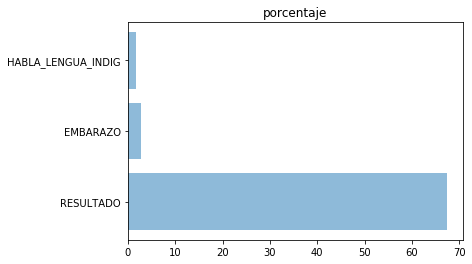

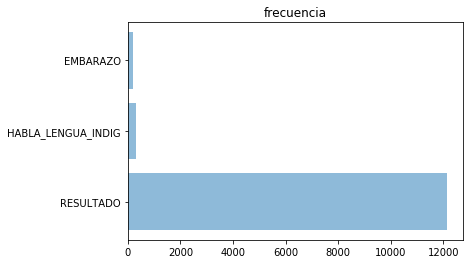

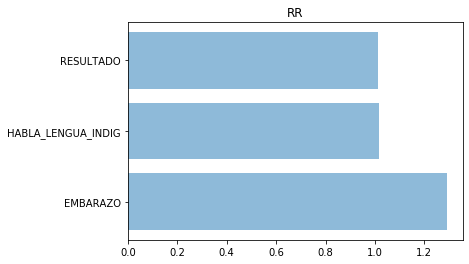

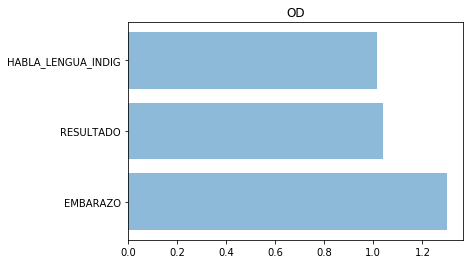

In [20]:
asociar_otros(df_SIN_99_97,"AGUASCALIENTES")